In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


## Load Database

In [2]:
col = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income",
]
tab1 = pd.read_csv(
    r"C:\Users\Ritwik\Desktop\Programming\Data Science\Salary prediction\adult original.csv",
    names=col,
)
tab = tab1
tab


,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Check for Info

In [3]:
tab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
tab.describe(include="all")


,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### In the table, null values are filled as " ?". So, we replace that with none

In [5]:
tab = tab.replace(" ?", None)
tab.isnull().sum()


Age                  0
Workclass         1836
Fnlwgt               0
Education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

#### As there is no dominant value for occupation, we will drop the null value rows 

In [6]:
tab = tab.dropna(subset=["occupation"], how="all")
tab.isnull().sum()


Age                 0
Workclass           0
Fnlwgt              0
Education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64

#### As more than 90% of the native countries are " United-States", we will replace the null values with it. 

In [7]:
tab["native_country"] = tab["native_country"].fillna(" United-States")
tab.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
tab.nunique()


Age                  72
Workclass             7
Fnlwgt            20495
Education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
income                2
dtype: int64

#### Education and education_num columns seems to be similar. Let's see

In [9]:
pd.crosstab(tab.Education, tab.education_num)


education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,831,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1056,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,393,0,0,0,0,0,0,0,0
1st-4th,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,303,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,573,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,463,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1020,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1321,0,0,0,0,0


#### We will drop Education column, as it is redundant in this case.

In [10]:
tab = tab.drop("Education", axis=1)
tab.shape


(30718, 14)

#### Now we will delete all the duplicate rows

In [11]:
tab = tab.drop_duplicates(keep="first")
tab.shape


(30694, 14)

#### Here, we will transform all the necessary columns to int type using Label Encoder

In [12]:
lb = LabelEncoder()
cols = [
    "Workclass",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native_country",
    "income",
]
for col in cols:
    tab[col] = lb.fit_transform(tab[col])


In [13]:
tab.dtypes


Age               int64
Workclass         int32
Fnlwgt            int64
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [14]:
tab


,Age,Workclass,Fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


In [15]:
tab.nunique()


Age                  72
Workclass             7
Fnlwgt            20495
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
income                2
dtype: int64

#### Now, let’s check the correlation between all the columns 

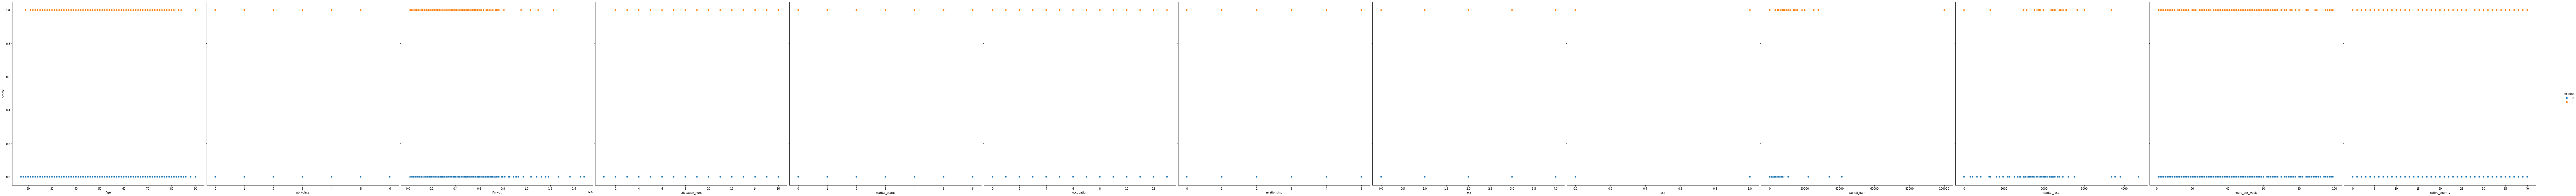

In [16]:
sb.pairplot(tab, y_vars=["income"], hue="income", height=10)


<AxesSubplot:>

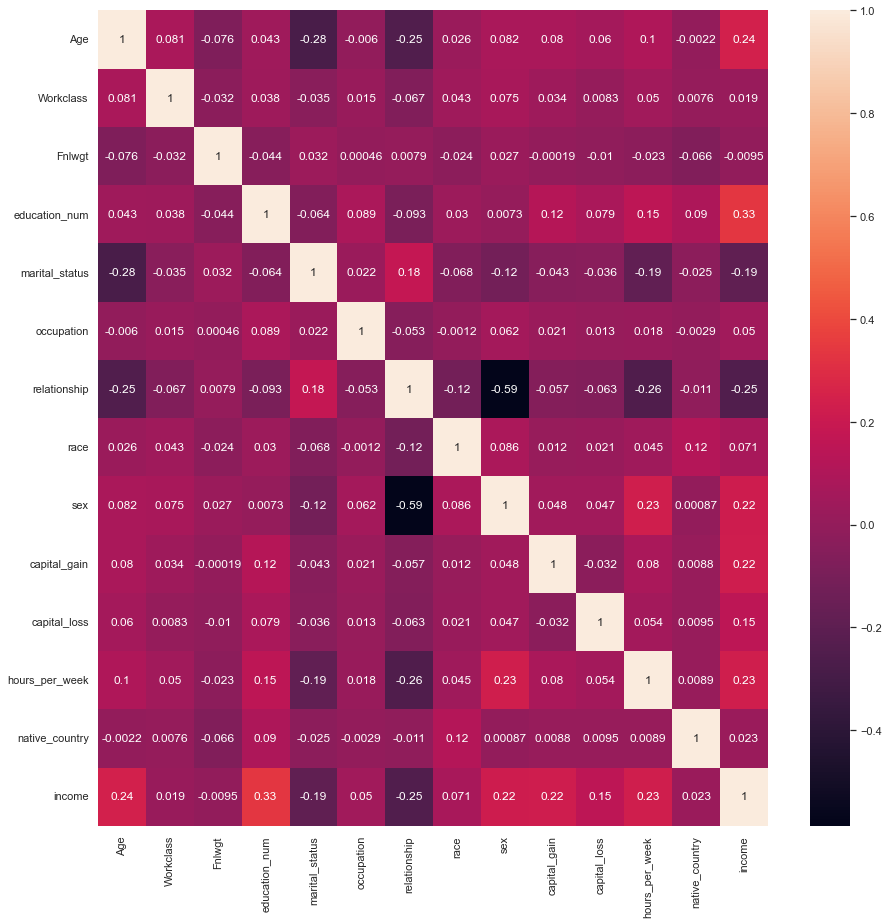

In [17]:
sb.set(rc={"figure.figsize": (15, 15)})
sb.heatmap(tab.corr(), annot=True)


#### Now, we will devide the data set into transform and target attributes

In [18]:
x = tab.iloc[:, :-1]
y = tab.iloc[:, -1]
print(x.shape)
print(y.shape)


(30694, 13)
(30694,)


#### Lets get train and test

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(23020, 13)
(7674, 13)
(23020,)
(7674,)


## Train and test models

#### Gaussian Naive Bayes Classifier

In [20]:
Algo = []
Accuracy = []


In [21]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_predict = nb.predict(x_test)
Algo.append("Gaussian Naive Bayes Classifier")
Accuracy.append(nb.score(x_test, y_test))


In [22]:
print(confusion_matrix(y_test, y_predict))
cm = classification_report(y_test, y_predict)
print(cm)


[[5491  332]
 [1298  553]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      5823
           1       0.62      0.30      0.40      1851

    accuracy                           0.79      7674
   macro avg       0.72      0.62      0.64      7674
weighted avg       0.76      0.79      0.76      7674



#### Decision Tree Classifier

In [23]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train, y_train)
y_predict = dtc.predict(x_test)
Algo.append("Decision Tree Classifier")
Accuracy.append(dtc.score(x_test, y_test))


In [24]:
print(confusion_matrix(y_test, y_predict))
cm = classification_report(y_test, y_predict)
print(cm)


[[5045  778]
 [ 716 1135]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5823
           1       0.59      0.61      0.60      1851

    accuracy                           0.81      7674
   macro avg       0.73      0.74      0.74      7674
weighted avg       0.81      0.81      0.81      7674



#### Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(criterion="gini")
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)
Algo.append("Random Forest Classifier")
Accuracy.append(rfc.score(x_test, y_test))


In [26]:
print(confusion_matrix(y_test, y_predict))
cm = classification_report(y_test, y_predict)
print(cm)


[[5405  418]
 [ 708 1143]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5823
           1       0.73      0.62      0.67      1851

    accuracy                           0.85      7674
   macro avg       0.81      0.77      0.79      7674
weighted avg       0.85      0.85      0.85      7674



#### Logistic Regression

In [27]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
Algo.append("Logistic Regression")
Accuracy.append(lr.score(x_test, y_test))


In [28]:
print(confusion_matrix(y_test, y_predict))
cm = classification_report(y_test, y_predict)
print(cm)


[[5478  345]
 [1327  524]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      5823
           1       0.60      0.28      0.39      1851

    accuracy                           0.78      7674
   macro avg       0.70      0.61      0.63      7674
weighted avg       0.76      0.78      0.75      7674



#### KNN Classifier

In [29]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train, y_train)
y_predict = knc.predict(x_test)
Algo.append("Logistic Regression")
Accuracy.append(knc.score(x_test, y_test))


In [30]:
print(confusion_matrix(y_test, y_predict))
cm = classification_report(y_test, y_predict)
print(cm)


[[5686  137]
 [1413  438]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5823
           1       0.76      0.24      0.36      1851

    accuracy                           0.80      7674
   macro avg       0.78      0.61      0.62      7674
weighted avg       0.79      0.80      0.75      7674



## All Models with Accuracy

In [31]:
rge = {"Algorithm": Algo, "Accuracy": Accuracy}
rg = pd.DataFrame(rge)
rg


,Algorithm,Accuracy
0,Gaussian Naive Bayes Classifier,0.787594
1,Decision Tree Classifier,0.805317
2,Random Forest Classifier,0.853271
3,Logistic Regression,0.782121
4,Logistic Regression,0.798019


#### As Random Forest Classifier has the best accuracy among all the other models, we will go with Random Forest Classifier as our final predictive model

In [32]:
final = RandomForestClassifier(criterion="gini")
final.fit(x_train, y_train)
y_predict = final.predict(x_test)
for i in y_predict:
    print(i,end=" ")


0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 

#### 0 denotes more than or equal to 50K, and 1 denotes less than 50K